### *Today's objective is to analyze the dataset, focusing on the timing of when crimes occurred.*

In [61]:
# Library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

#Define plot style
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('crime.csv',encoding = 'unicode_escape')

In [8]:
df.head().transpose()

,0,1,2,3,4
INCIDENT_NUMBER,I182070945,I182070943,I182070941,I182070940,I182070938
OFFENSE_CODE,619,1402,3410,3114,3114
OFFENSE_CODE_GROUP,Larceny,Vandalism,Towed,Investigate Property,Investigate Property
OFFENSE_DESCRIPTION,LARCENY ALL OTHERS,VANDALISM,TOWED MOTOR VEHICLE,INVESTIGATE PROPERTY,INVESTIGATE PROPERTY
DISTRICT,D14,C11,D4,D4,B3
REPORTING_AREA,808,347,151,272,421
SHOOTING,NaN,NaN,NaN,NaN,NaN
OCCURRED_ON_DATE,2018-09-02 13:00:00,2018-08-21 00:00:00,2018-09-03 19:27:00,2018-09-03 21:16:00,2018-09-03 21:05:00
YEAR,2018,2018,2018,2018,2018
MONTH,9,8,9,9,9


In [9]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [10]:
df.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE','REPORTING_AREA','UCR_PART','Location'], axis = 1, inplace=True) #drop unnecessary columns

In [11]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [12]:
df['SHOOTING'].fillna('N', inplace=True) #changing NaN to N in the shooting column

In [13]:
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   319073 non-null  object 
 1   OFFENSE_DESCRIPTION  319073 non-null  object 
 2   DISTRICT             317308 non-null  object 
 3   SHOOTING             319073 non-null  object 
 4   OCCURRED_ON_DATE     319073 non-null  object 
 5   YEAR                 319073 non-null  int64  
 6   MONTH                319073 non-null  int64  
 7   DAY_OF_WEEK          319073 non-null  object 
 8   HOUR                 319073 non-null  int64  
 9   STREET               308202 non-null  object 
 10  Lat                  299074 non-null  float64
 11  Long                 299074 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 29.2+ MB


In [16]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE']) #convert to datetime

In [19]:
df.info() #checking to confirm changes made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_CODE_GROUP   319073 non-null  object        
 1   OFFENSE_DESCRIPTION  319073 non-null  object        
 2   DISTRICT             317308 non-null  object        
 3   SHOOTING             319073 non-null  object        
 4   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 5   YEAR                 319073 non-null  int64         
 6   MONTH                319073 non-null  int64         
 7   DAY_OF_WEEK          319073 non-null  object        
 8   HOUR                 319073 non-null  int64         
 9   STREET               308202 non-null  object        
 10  Lat                  299074 non-null  float64       
 11  Long                 299074 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 29.2

In [20]:
df['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [21]:
rename_crimes = {"INVESTIGATE PERSON":"Investigate Person",
                "HUMAN TRAFFICKING":"Human Trafficking",
                "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE":"Involuntary Servitude"}

df["OFFENSE_CODE_GROUP"].replace(rename_crimes, inplace=True) #changing the names of some crimes to fit into the already existing pattern

Text(0.5, 1.0, 'The number of crimes committed each year in the Boston (2015-2018)')

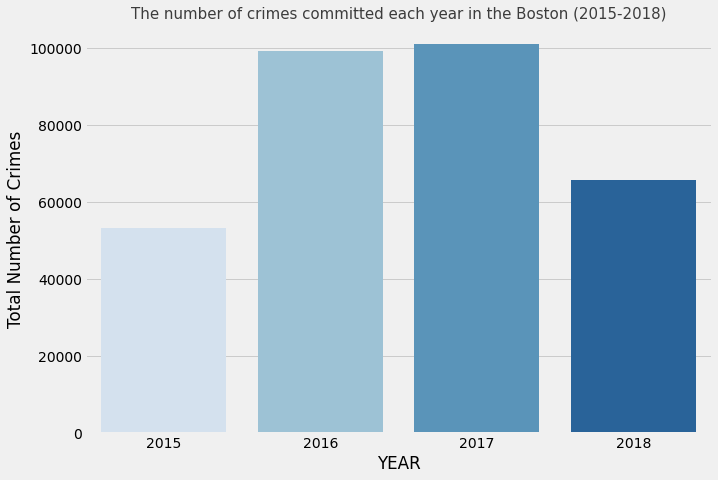

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(x="YEAR", data=df, palette="Blues")
plt.ylabel("Total Number of Crimes")
plt.title("The number of crimes committed each year in the Boston (2015-2018)", alpha=0.75, fontsize=15)

In [27]:
df.groupby('YEAR').size()

YEAR
2015     53388
2016     99114
2017    100886
2018     65685
dtype: int64

Text(0.5, 1.0, 'The number of crimes committed each month in the Boston (2015-2018)')

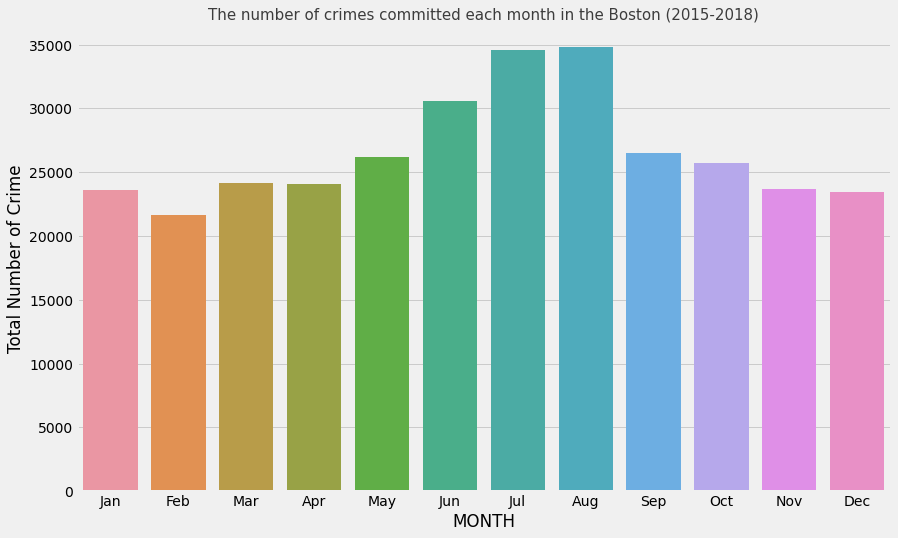

In [72]:
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names

# Plot the countplot with month names
plt.figure(figsize=(13,8))
sns.countplot(x="MONTH", data=df)
plt.xticks(ticks=range(12), labels=month_names)  # Set the month names as x-axis labels
plt.ylabel("Total Number of Crime")
plt.title("The number of crimes committed each month in the Boston (2015-2018)", alpha=0.75, fontsize=15)

In [67]:
# Group by month and get the size of each group
df.groupby(df['MONTH'].apply(lambda x: calendar.month_abbr[x])).size().sort_values(ascending=False)

MONTH
Aug    34823
Jul    34556
Jun    30568
Sep    26543
May    26199
Oct    25737
Mar    24146
Apr    24086
Nov    23675
Jan    23610
Dec    23477
Feb    21653
dtype: int64

Text(0.5, 1.0, 'The number of crimes committed each month in the Boston (2015-2018)')

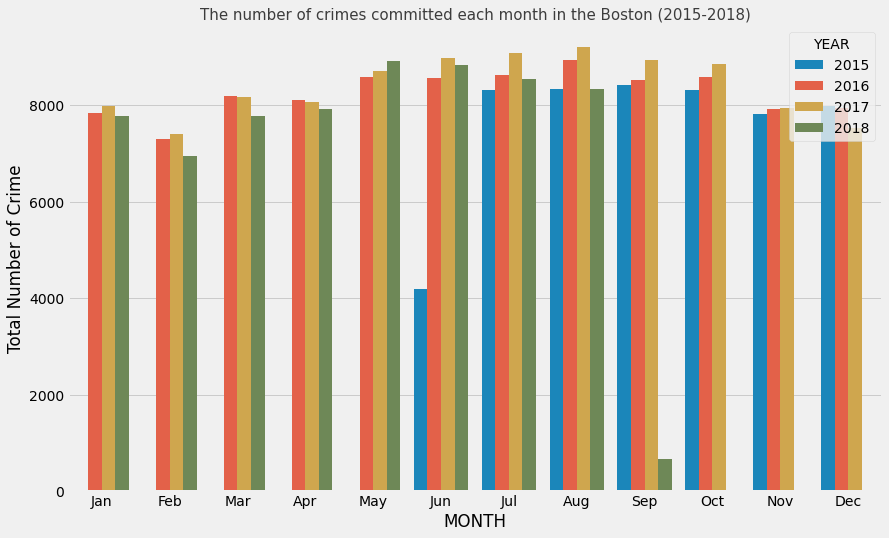

In [74]:
# Create a list of month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names

# Plot the countplot with month names
plt.figure(figsize=(13,8))
sns.countplot(x='MONTH', data=df, hue="YEAR")
plt.xticks(ticks=range(12), labels=month_names)  # Set the month names as x-axis labels
plt.ylabel("Total Number of Crime")
plt.title("The number of crimes committed each month in the Boston (2015-2018)", alpha=0.75, fontsize=15)


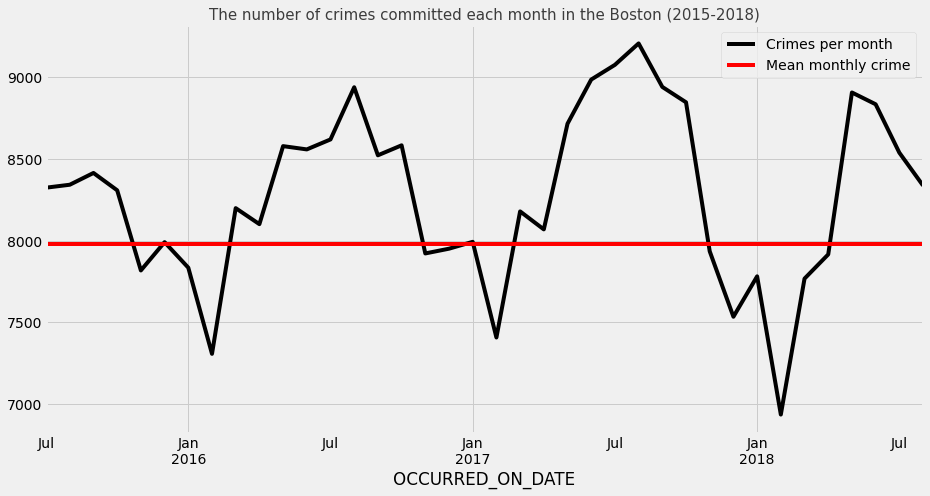

In [75]:
crimes_m = (
    df.set_index("OCCURRED_ON_DATE")
    .resample("M")
    .size()
    .rename("Crimes per month")
    .to_frame()
    .assign(mean=lambda x: x["Crimes per month"].mean())
    .drop(pd.to_datetime(["2018-09-30", "2015-06-30"]))
)

fig, ax = plt.subplots(figsize=(14, 7))
crimes_m["Crimes per month"].plot(label="Crimes per month", color="black", ax=ax)
crimes_m["mean"].plot(label="Mean monthly crime", color="r", linewidth=4, ax=ax)
plt.legend()
plt.title("The number of crimes committed each month in the Boston (2015-2018)", alpha=0.75, fontsize=15)
plt.show()

C:\Users\edehc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\edehc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-0.75, 55000, 'Daily and hourly number of crimes in the Boston area.')

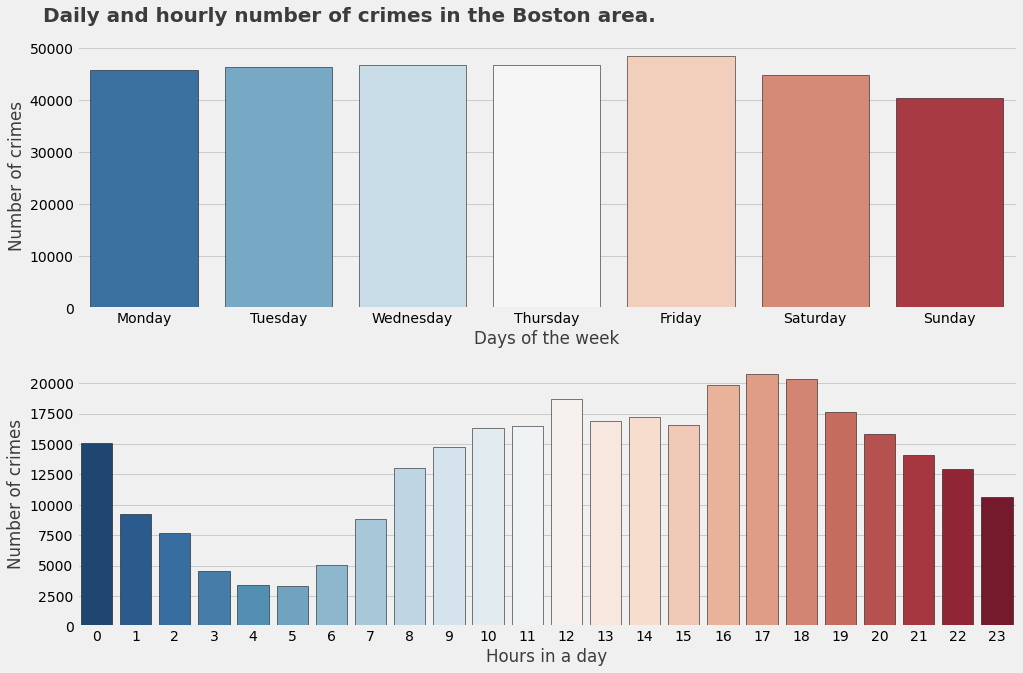

In [79]:
day_order = list(calendar.day_name)

fig,(ax1,ax2) = plt.subplots(2,1, figsize=[15,10])

sns.countplot("DAY_OF_WEEK", data=df,order=day_order,palette="RdBu_r",edgecolor="black", ax = ax1)
ax1.set_xlabel("Days of the week", alpha=0.75)
ax1.set_ylabel("Number of crimes", alpha=0.75)

sns.countplot("HOUR", data=df,palette="RdBu_r",edgecolor="black", ax = ax2)
ax2.set_xlabel("Hours in a day", alpha=0.75)
ax2.set_ylabel("Number of crimes", alpha=0.75)

ax1.text(x=-0.75,y=55000,s="Daily and hourly number of crimes in the Boston area.",weight="bold",alpha=0.75, fontsize=20)

C:\Users\edehc\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


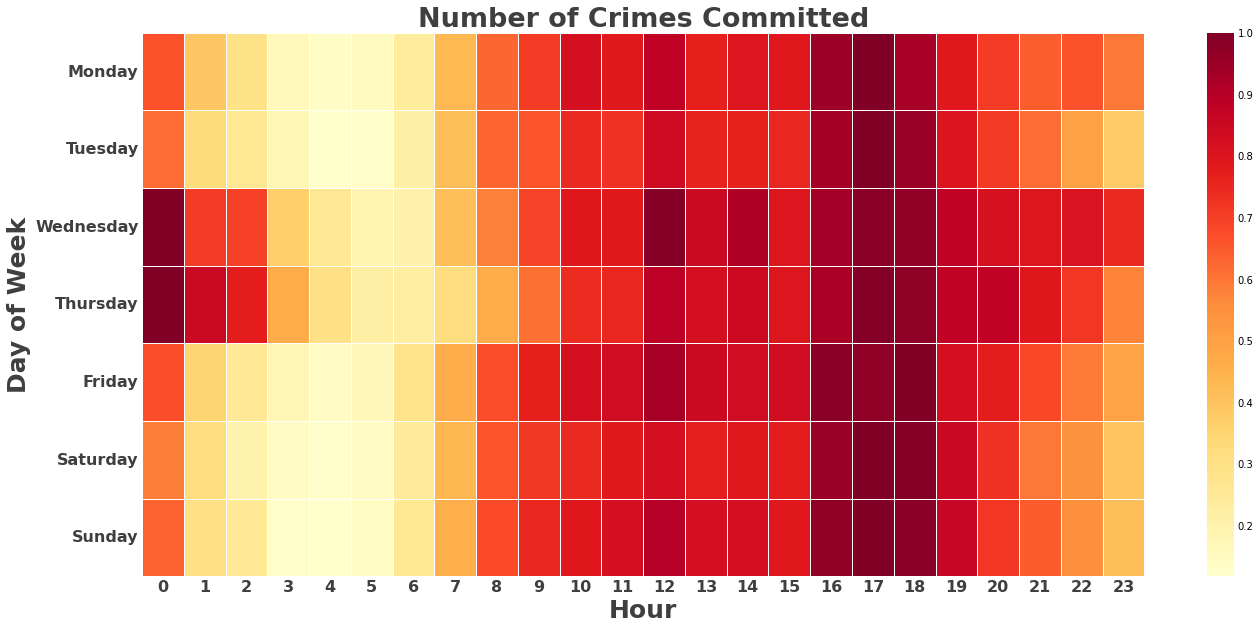

In [53]:
# Extract hours, weekdays, and crimes committed
temp_df = df[['OFFENSE_CODE_GROUP', 'OCCURRED_ON_DATE']]
temp_df.loc[:, "Hour"] = temp_df.OCCURRED_ON_DATE.dt.hour
temp_df.loc[:, "WeekDay"] = temp_df.OCCURRED_ON_DATE.dt.day_name()
pivot_temp = temp_df.pivot_table(index='WeekDay', columns='Hour', aggfunc='size', fill_value=0)

# Normalize the values
pivot_temp = pivot_temp.div(pivot_temp.max(axis=1), axis=0)

# Plotting
plt.figure(figsize=(20, 10))
ax = sns.heatmap(pivot_temp, linewidths=0.5, cmap="YlOrRd")

# Displaying the days of the week on the chart
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_yticklabels(days_of_week, rotation=0)

# Customize axis labels and title
plt.xlabel("Hour", weight="bold", fontsize=25, alpha=0.75)
plt.ylabel("Day of Week", weight="bold", fontsize=25, alpha=0.75)
plt.title("Number of Crimes Committed", weight="bold", fontsize=27, alpha=0.75)

plt.xticks(weight="bold", fontsize=16, alpha=0.75)
plt.yticks(weight="bold", fontsize=16, alpha=0.75)

plt.show()
